In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arc
import numpy as np
import os

np.random.seed(37)

class Face():
    def __init__(self, coef=None):
        if coef is None:
            self.coef_ = np.insert(np.random.rand(17), 0, 0.9)
        else:
            self.coef_ = coef
    
    def next(self, N=1):
        x0 = np.full((1, N), self.coef_[0])
        x1 = np.random.normal(self.coef_[1], 0.1, N)
        x2 = np.random.normal(0.3 * x1, 0.1, N)
        x3 = np.random.normal(0.25 * x1, 0.1, N)
        x4 = np.random.normal(0.25 * x2 + 0.33 * x3, 0.2, N)
        x5 = np.random.normal(0.77 * x4, 0.1, N)
        x6 = np.random.normal(0.66 * x4, 0.2, N)
        x7 = np.random.normal(0.33 * x4, 0.02, N)
        x8 = np.random.normal(0.20 * x5 + 0.32 * x6 + 0.18 * x7, 0.1, N)
        x9 = np.random.normal(0.5 * x8, 0.03, N)
        x10 = np.random.normal(0.2 * x9, 0.05, N)
        x11 = np.random.normal(0.3 * x9 + 0.4 * x10, 0.03, N)
        x12 = np.random.normal(0.4 * x10 + 0.25 * x11, 0.08, N)
        x13 = np.random.normal(0.2 * x10 + 0.02 * x11 + 0.12 * x12, 0.05, N)
        x14 = np.random.normal(0.5 * x13, 0.01, N)
        x15 = np.random.normal(0.5 * x14, 0.01, N)
        x16 = np.random.normal(0.5 * x15, 0.01, N)
        x17 = np.random.normal(0.5 * x16, 0.01, N)
        
        a = np.vstack([x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17]).T
        b = (a - np.min(a))/np.ptp(a)
        return b
    

def cface(ax,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,odir=None,ofile=None):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='blue', linewidth=10)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='blue', linewidth=10)
    ax.add_artist(e)

    # cover overlaps
    e = Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', ec='none')
    ax.add_artist(e)
    e = Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', ec='none')
    ax.add_artist(e)
    
    # draw nose
    plt.plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/np.pi*np.arctan(x8*x9), theta2=270+180/np.pi*np.arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/np.pi*x12, facecolor='yellow')
    ax.add_artist(p)
    
    p = Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/np.pi*x12, facecolor='green')
    ax.add_artist(p)

    # draw pupils
    p = Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    plt.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    plt.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])
    if odir is not None and ofile is not None:
        opath = '{}/{}'.format(odir, ofile)
        plt.savefig(opath, quality=100, optimize=True)

def plot(X):
    fig = plt.figure(figsize=(11,11))
    for i in range(X.shape[0]):
        ax = fig.add_subplot(5,5,i+1,aspect='equal')
        cface(ax, *X[i])

    fig.subplots_adjust(hspace=0, wspace=0)
    plt.tight_layout()
    plt.show()
    
def save_plots(X, offset=0, width=3, height=3, odir=None):
    for i in range(X.shape[0]):
        fig, ax = plt.subplots(figsize=(width, height))
        num = f'{i+offset:03}'
        ofile = '{}.jpg'.format(num)
        cface(ax, *X[i], odir=odir, ofile=ofile)
        plt.close()
        
def make_dirs(num_clazzes, root_path='./faces'):
    tr_path = '{}/train'.format(root_path)
    te_path = '{}/test'.format(root_path)
    va_path = '{}/valid'.format(root_path)
    
    dir_paths = [tr_path, te_path, va_path]
    
    for dir_path in dir_paths:
        for i in range(num_clazzes):
            num = f'{i:02}'
            subfolder_path = '{}/{}'.format(dir_path, num)
            if not os.path.exists(subfolder_path):
                os.makedirs(subfolder_path)
                print('creating {}'.format(subfolder_path))
            else:
                print('{} already exists'.format(subfolder_path))

In [2]:
f0 = Face()
f1 = Face()
f2 = Face()
f3 = Face()

X0 = f0.next(250)
X1 = f1.next(250)
X2 = f2.next(75)
X3 = f3.next(75)

faces = [X0, X1, X2, X3]
tr_indices = [(0, 200), (0, 200), (0, 25), (0, 25)]
te_indices = [(200, 225), (200, 225), (25, 50), (25, 50)]
va_indices = [(225, 250), (225, 250), (50, 75), (50, 75)]

make_dirs(len(faces))

creating ./faces/train/00
creating ./faces/train/01
creating ./faces/train/02
creating ./faces/train/03
creating ./faces/test/00
creating ./faces/test/01
creating ./faces/test/02
creating ./faces/test/03
creating ./faces/valid/00
creating ./faces/valid/01
creating ./faces/valid/02
creating ./faces/valid/03


In [3]:
for clazz, (X, tr, te, va) in enumerate(zip(faces, tr_indices, te_indices, va_indices)):
    X_tr = X[tr[0]:tr[1], :]
    X_te = X[te[0]:te[1], :]
    X_va = X[va[0]:va[1], :]
    
    num = f'{clazz:02}'
    
    dir_tr = './faces/train/{}'.format(num)
    dir_te = './faces/test/{}'.format(num)
    dir_va = './faces/valid/{}'.format(num)
    
    save_plots(X_tr, offset=tr[0], odir=dir_tr)
    save_plots(X_te, offset=te[0], odir=dir_te)
    save_plots(X_va, offset=va[0], odir=dir_va)
print('done!')

done!


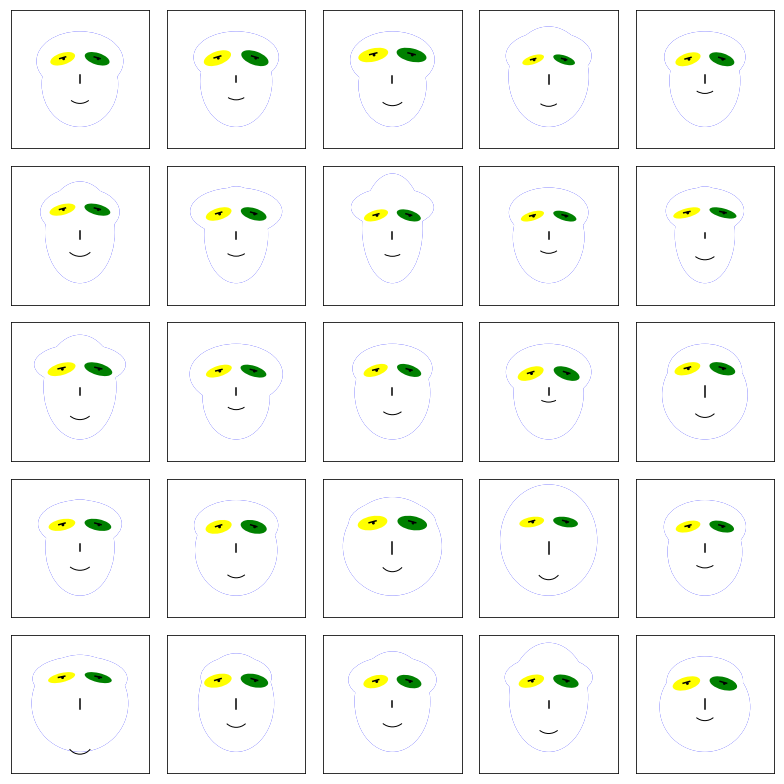

In [4]:
plot(X0[0:25,:])

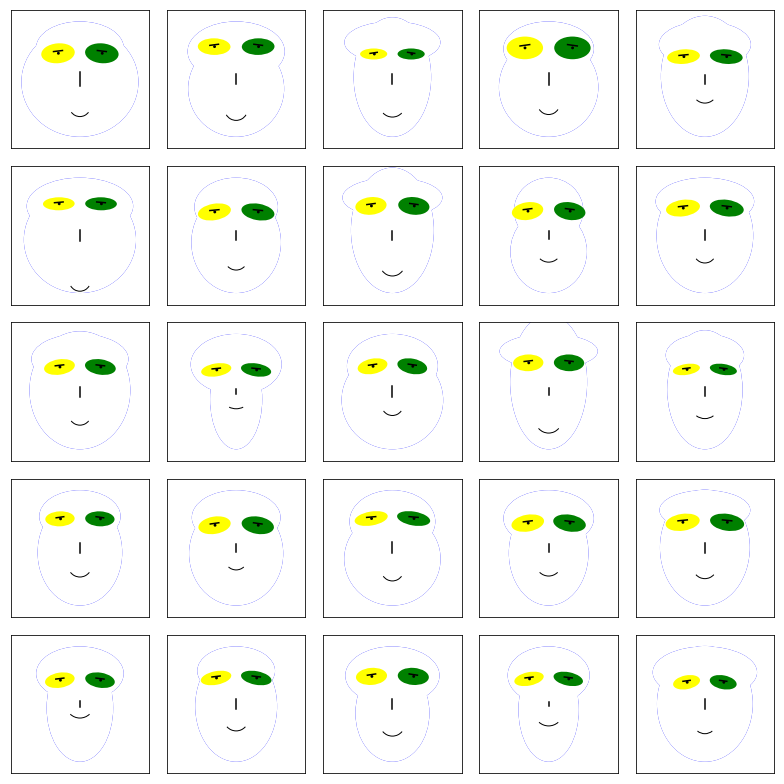

In [5]:
plot(X1[0:25,:])

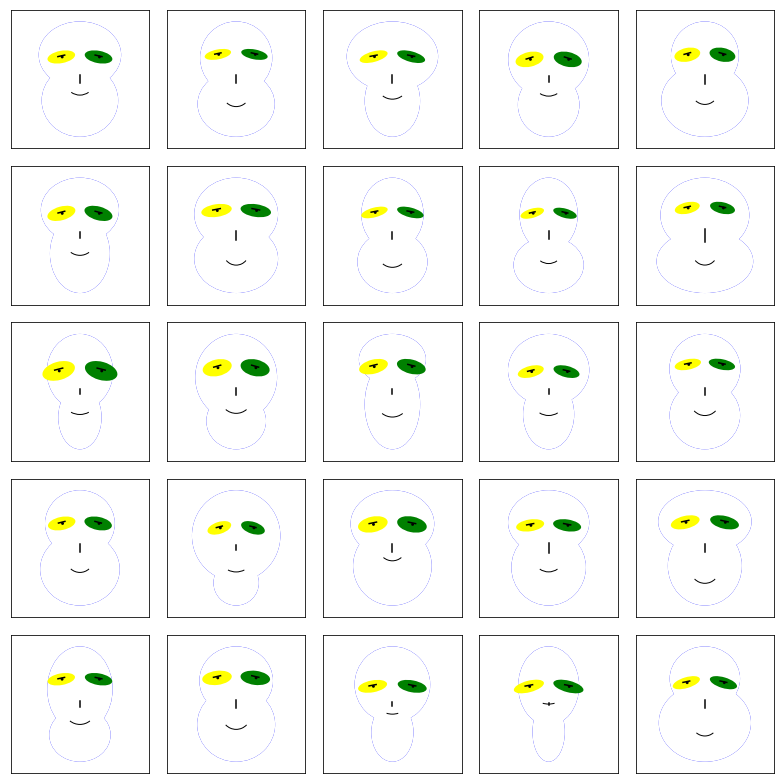

In [6]:
plot(X2[0:25,:])

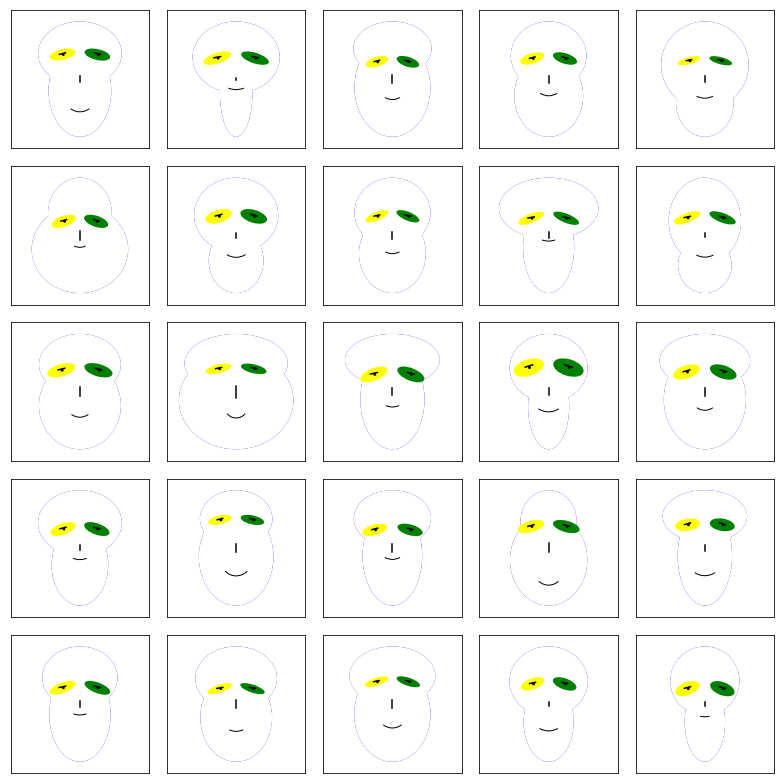

In [7]:
plot(X3[0:25,:])

# Links

* https://healthyalgorithms.com/2012/11/12/dataviz-in-python-chernoff-faces-with-matplotlib/
* https://flowingdata.com/2010/08/31/how-to-visualize-data-with-cartoonish-faces/